In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('spam.csv', encoding='Latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore', inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='v1', ylabel='count'>

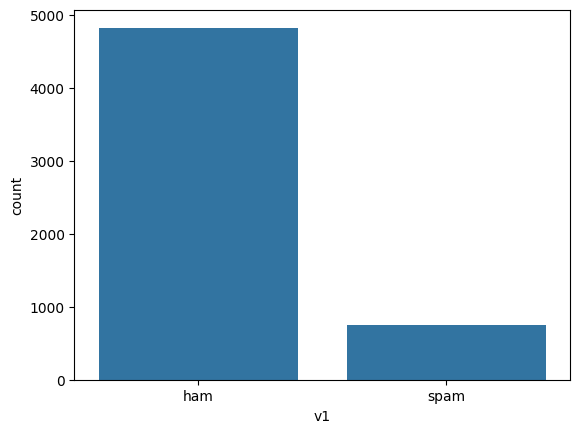

In [6]:
sns.countplot(x='v1', data=data)

In [7]:
data.isna().sum()

,0
v1,0
v2,0


In [9]:
data['v1']=data['v1'].map({'ham':0 , 'spam':1})

In [10]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [39]:
corpus=[]

In [40]:
for i in range (0,len(data)):
  msg=re.sub('[^a-zA-Z]', ' ', data['v2'][i])
  msg=msg.lower()
  msg=msg.split()
  stemmer=SnowballStemmer(language='english')
  msg=[stemmer.stem(word) for word in msg if not word in set(stopwords.words('english'))]
  msg= ' '.join(msg)
  corpus.append(msg)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=data.iloc[:,0].values

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
x_train.shape

(4457, 6216)

In [46]:
x_test.shape

(1115, 6216)

In [121]:
from sklearn.naive_bayes import MultinomialNB
naivemodel=MultinomialNB()
naivemodel.fit(x_train, y_train)

MultinomialNB()

In [122]:
y_pred=naivemodel.predict(x_test)

<Axes: >

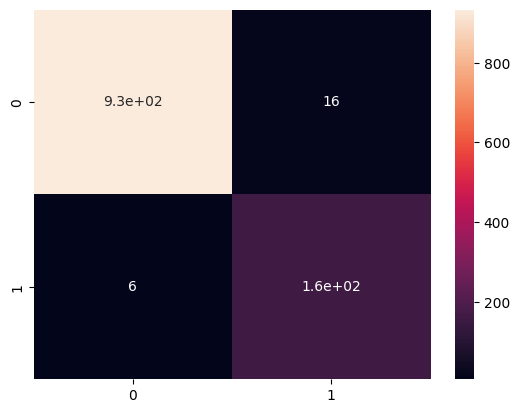

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [124]:
precision_score(y_test, y_pred)

0.9090909090909091

In [125]:
recall_score(y_test, y_pred)

0.963855421686747

In [126]:
accuracy_score(y_test, y_pred)

0.9802690582959641

In [127]:
#test with new data
text='Click here and get offer ! '

In [128]:
text=np.array([text])

In [129]:
text=cv.transform(text)

In [130]:
naivemodel.predict(text)

array([1])

In [135]:
import pickle

In [136]:
pickle.dump(naivemodel, open('model.pkl', 'wb'))

In [137]:
pickle.dump(cv, open('vector.pkl', 'wb'))